In [1]:
# Importing all the necessary Python libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error
from math import sqrt
from random import randint
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.callbacks import EarlyStopping
from keras import initializers
from matplotlib import pyplot
from datetime import datetime
from matplotlib import pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
%matplotlib inline

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20190801160555-0000
KERNEL_ID = 62f4b804-2686-46c1-a5e6-8304ff0a4a8d


Using TensorFlow backend.


In [2]:
# Load the dataset into memory and test the presence of null values
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_c2e1c3c52bbf4245bf6cdc2055b7eb94 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='cgfXVwWvgKivbRJMOL0aqMV_ASX5Xh0IyKw_OeawnQl_',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_c2e1c3c52bbf4245bf6cdc2055b7eb94.get_object(Bucket='default-donotdelete-pr-k2nfkx3pgq4cfh',Key='bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data = data[24:]
data.isnull().values.any()

False

In [3]:
# Preview the head of the datset to know the structure of the data
data.head(30)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
24,1483386240,1013.13,1013.5,1011.07,1011.12,2.647,2678.703508,1011.977147
25,1483386300,1011.42,1013.44,1011.42,1012.98,0.34446051,348.7731049,1012.519853
26,1483386360,1011.16,1012.98,1010.87,1012.68,1.58260421,1601.302569,1011.814931
27,1483386420,1010.87,1011.81,1010.74,1011.72,34.76140282,35136.65413,1010.795056
28,1483386480,1011,1012.65,1010.87,1012.65,0.08126573,82.26255254,1012.26621
29,1483386540,1012.6,1012.6,1011.75,1011.86,0.09008366,91.18066414,1012.177615
30,1483386600,1011.35,1011.35,1010.74,1010.74,2.238,2262.070263,1010.755256
31,1483386660,1011.76,1011.76,1010.9,1010.9,0.0204,20.635604,1011.549216
32,1483386720,1010.9,1011.24,1009.89,1010,8.85951757,8949.286913,1010.132532
33,1483386780,1009.9,1009.97,1009.89,1009.89,23.8030312,24038.57767,1009.89565


In [4]:
# Converting to numeric data type
data['Weighted_Price'] = data['Weighted_Price'].astype(float)
data[pd.to_numeric(data['Weighted_Price'], errors='coerce').notnull()]
data['Weighted_Price'].dtype

dtype('float64')

In [5]:
#transform the data to get the average price grouped by the day and to see usual datetime format (not a timestamp as above).
data['date'] = pd.to_datetime(data['Timestamp'],unit='s').dt.date
group = data.groupby(data['date'])

Daily_Price = group['Weighted_Price'].mean()

Daily_Price.head()

date
2017-01-02    1011.048514
2017-01-03    1020.001381
2017-01-04    1080.395234
2017-01-05    1038.182218
2017-01-06     929.908378
Name: Weighted_Price, dtype: float64

In [6]:
Daily_Price.tail()

date
2019-01-02    3824.734267
2019-01-03    3829.101628
2019-01-04    3784.217057
2019-01-05    3834.230598
2019-01-06    3796.503421
Name: Weighted_Price, dtype: float64

In [7]:
# Counts the necessary parameters for splitting (number of days between some dates) training and test data. 
#The training data will be from 4 April 2017 to 1 Jan 2019. The test data will be from 13 Jan 2019 to 13 March 2019
from datetime import date

d0 = date(2017, 4, 13)
d1 = date(2019, 1, 13)
delta = d1 - d0
days_look = delta.days + 1
print(days_look)

d0 = date(2019, 1, 13)
d1 = date(2019, 3, 13)
delta = d1 - d0
days_from_train = delta.days + 1
print(days_from_train)

d0 = date(2017, 10, 15)
d1 = date(2017, 10, 20)
delta = d1 - d0
days_from_end = delta.days + 1
print(days_from_end)

641
60
6


In [8]:
# Splitting training and test data
df_train= Daily_Price[len(Daily_Price)-days_look-days_from_end:len(Daily_Price)-days_from_train]
df_test= Daily_Price[len(Daily_Price)-days_from_train:]

print(len(df_train), len(df_test))

587 60


In [9]:
## Exploratory Data Analysis
# Estimate some parameters of the data 
# Must check if data is stationary -- influenced by factors such as trend or seasonality


In [10]:
# Concatenating training and test data to make analysis and transformations simultaneously
working_data = [df_train, df_test]
working_data = pd.concat(working_data)

working_data = working_data.reset_index()
working_data['date'] = pd.to_datetime(working_data['date'])
working_data = working_data.set_index('date')

In [13]:
# Seasonal decomposition of data to estimate trend and seasonality 
# This indicates the actual price movements
s = sm.tsa.seasonal_decompose(working_data.Weighted_Price.values, freq=60)

trace1 = go.Scatter(x = np.arange(0, len(s.trend), 1),y = s.trend,mode = 'lines',name = 'Trend',
    line = dict(color = ('rgb(244, 146, 65)'), width = 4))
trace2 = go.Scatter(x = np.arange(0, len(s.seasonal), 1),y = s.seasonal,mode = 'lines',name = 'Seasonal',
    line = dict(color = ('rgb(66, 244, 155)'), width = 2))

trace3 = go.Scatter(x = np.arange(0, len(s.resid), 1),y = s.resid,mode = 'lines',name = 'Residual',
    line = dict(color = ('rgb(209, 244, 66)'), width = 2))

trace4 = go.Scatter(x = np.arange(0, len(s.observed), 1),y = s.observed,mode = 'lines',name = 'Observed',
    line = dict(color = ('rgb(66, 134, 244)'), width = 2))

data = [trace1, trace2, trace3, trace4]
layout = dict(title = 'Seasonal decomposition', xaxis = dict(title = 'Time'), yaxis = dict(title = 'Price, USD'))
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='seasonal_decomposition')

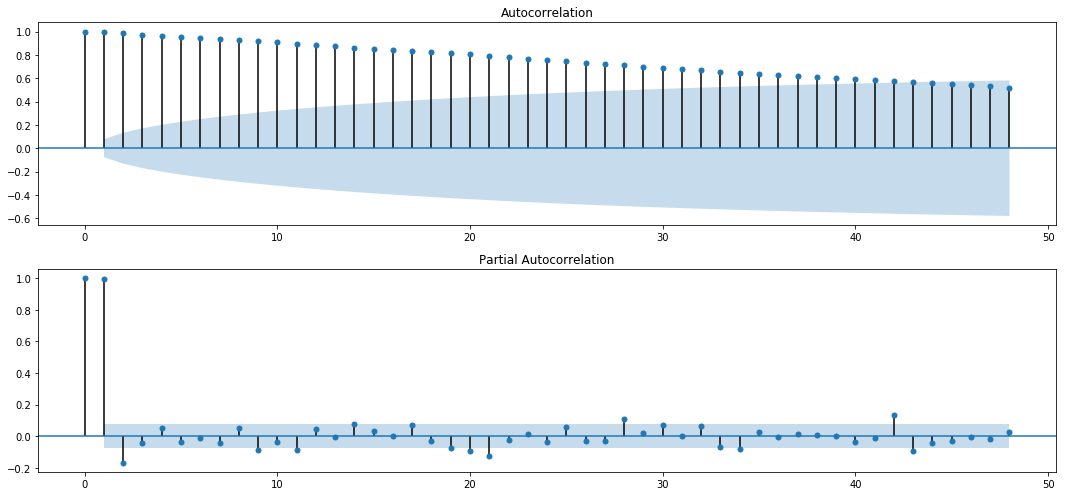

In [12]:
# Examine the autocorrelation 
# This is similarity between observations as a function of the time lag between them 
# This helps find repeating patterns in the data
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(working_data.Weighted_Price.values.squeeze(), lags=48, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(working_data.Weighted_Price.values.squeeze(), lags=48, ax=ax)
plt.tight_layout()
plt.show()

In [14]:
# Recover train and test datasets
df_train = working_data[:-60]
df_test = working_data[-60:]

In [15]:
## Data Preparation
# Prepare dataset according to requirements of the model

In [15]:
# Define a function that creates X inputs and Y labels 
# Y label is the value from the future point 
# X label is one or several values from the past
# look_back parameter sets the amount of X values i.e. if it is 1 we predict the future value, just on today's data
def create_lookback(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [16]:
## Final Data Preparation

# 1. Reshape the train and test datasets according to the requirements of the model.
# 2. Scale the dataset by using the MinMaxScaler because LSTM models are scale sensitive.
# 3. Apply the create lookback function
from sklearn.preprocessing import MinMaxScaler

training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
test_set = df_test.values
test_set = np.reshape(test_set, (len(test_set), 1))

#scale datasets
scaler = MinMaxScaler()
training_set = scaler.fit_transform(training_set)
test_set = scaler.transform(test_set)

# create datasets which are suitable for time series forecasting
look_back = 1
X_train, Y_train = create_lookback(training_set, look_back)
X_test, Y_test = create_lookback(test_set, look_back)

 # reshape datasets so that they will be ok for the requirements of the LSTM model in Keras
X_train = np.reshape(X_train, (len(X_train), 1, X_train.shape[1]))
X_test = np.reshape(X_test, (len(X_test), 1, X_test.shape[1]))

In [26]:
## Training two layered LSTM Neural Network
# Model consists of two stacked LSTM layers with 256 units each and the densely connected output layer with one neuron
# Using Adam optimizer and MSE as loss function
# Using early stopping if the result doesn't improve after 20 epochs
# shuffle is set to false so time series data does not get shuffled
# initialize sequential model, add 2 stacked LSTM layers and densely connected output neuron
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(256))
model.add(Dense(1))

# compile and fit the model
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, Y_train, epochs=100, batch_size=16, shuffle=False,
                    validation_data=(X_test, Y_test),
                    callbacks = [EarlyStopping(monitor='val_loss', min_delta=5e-5, patience=20, verbose=1)])


Train on 586 samples, validate on 59 samples
Epoch 1/100
586/586 [==============================] - 6s 10ms/step - loss: 0.0384 - val_loss: 0.0360
Epoch 2/100
586/586 [==============================] - 1s 2ms/step - loss: 0.0390 - val_loss: 0.0268
Epoch 3/100
586/586 [==============================] - 1s 2ms/step - loss: 0.0224 - val_loss: 0.0124
Epoch 4/100
586/586 [==============================] - 1s 2ms/step - loss: 0.0101 - val_loss: 0.0029
Epoch 5/100
586/586 [==============================] - 1s 2ms/step - loss: 0.0021 - val_loss: 1.9853e-04
Epoch 6/100
586/586 [==============================] - 1s 2ms/step - loss: 5.1129e-04 - val_loss: 1.5523e-04
Epoch 7/100
586/586 [==============================] - 1s 2ms/step - loss: 4.6196e-04 - val_loss: 1.7417e-04
Epoch 8/100
586/586 [==============================] - 1s 2ms/step - loss: 4.6227e-04 - val_loss: 1.6820e-04
Epoch 9/100
586/586 [==============================] - 1s 2ms/step - loss: 4.5837e-04 - val_loss: 1.6613e-04
Epoch 10/

In [27]:
# Plotting training and test loss
trace1 = go.Scatter(
    x = np.arange(0, len(history.history['loss']), 1),
    y = history.history['loss'],
    mode = 'lines',
    name = 'Train loss',
    line = dict(color=('rgb(66, 244, 155)'), width=2, dash='dash')
)
trace2 = go.Scatter(
    x = np.arange(0, len(history.history['val_loss']), 1),
    y = history.history['val_loss'],
    mode = 'lines',
    name = 'Test loss',
    line = dict(color=('rgb(244, 146, 65)'), width=2)
)

data = [trace1, trace2]
layout = dict(title = 'Train and Test Loss during training',
              xaxis = dict(title = 'Epoch number'), yaxis = dict(title = 'Loss'))
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='training_process')

In [31]:
# Use the model to predict labels for the test set 
# Then, inverse scale of data
# add one additional data point to align shapes of the predictions and true labels
X_test = np.append(X_test, scaler.transform(working_data.iloc[-1][0]))
X_test = np.reshape(X_test, (len(X_test), 1, 1))

# get predictions and then make some transformations to be able to calculate RMSE properly in USD
prediction = model.predict(X_test)
prediction_inverse = scaler.inverse_transform(prediction.reshape(-1, 1))
Y_test_inverse = scaler.inverse_transform(Y_test.reshape(-1, 1))
prediction2_inverse = np.array(prediction_inverse[:,0][1:])
Y_test2_inverse = np.array(Y_test_inverse[:,0])

ValueError: Expected 2D array, got scalar array instead:
array=3796.503420786886.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# comparison of true and predicted labels
trace1 = go.Scatter(
    x = np.arange(0, len(prediction2_inverse), 1),
    y = prediction2_inverse,
    mode = 'lines',
    name = 'Predicted labels',
    line = dict(color=('rgb(244, 146, 65)'), width=2)
)
trace2 = go.Scatter(
    x = np.arange(0, len(Y_test2_inverse), 1),
    y = Y_test2_inverse,
    mode = 'lines',
    name = 'True labels',
    line = dict(color=('rgb(66, 244, 155)'), width=2)
)

data = [trace1, trace2]
layout = dict(title = 'Comparison of true prices (on the test dataset) with prices our model predicted',
             xaxis = dict(title = 'Day number'), yaxis = dict(title = 'Price, USD'))
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='results_demonstrating0')

In [ ]:
# RMSE - average distance between predicted points on the test set and the actual points 
RMSE = sqrt(mean_squared_error(Y_test2_inverse, prediction2_inverse))
print('Test RMSE: %.3f' % RMSE)

In [17]:
# 
Test_Dates = Daily_Price[len(Daily_Price)-days_from_train:].index

trace1 = go.Scatter(x=Test_Dates, y=Y_test2_inverse, name= 'Actual Price',
                   line = dict(color = ('rgb(66, 244, 155)'),width = 2))
trace2 = go.Scatter(x=Test_Dates, y=prediction2_inverse, name= 'Predicted Price',
                   line = dict(color = ('rgb(244, 146, 65)'),width = 2))
data = [trace1, trace2]
layout = dict(title = 'Comparison of true prices (on the test dataset) with prices our model predicted, by dates',
             xaxis = dict(title = 'Date'), yaxis = dict(title = 'Price, USD'))
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='results_demonstrating1')

NameError: name 'Y_test2_inverse' is not defined

In [18]:
# This function prepares random train/test split,
# scales data with MinMaxScaler, create time series labels (Y)
def get_split(working_data, n_train, n_test, look_back = 1):
    # get a point from which we start to take train dataset and after it - test dataset
    start_point = randint(0, (len(working_data)-n_test-n_train))
    df_train = working_data[start_point:start_point+n_train]
    df_test = working_data[start_point+n_train:start_point+n_train+n_test]

    training_set = df_train.values
    training_set = np.reshape(training_set, (len(training_set), 1))
    test_set = df_test.values
    test_set = np.reshape(test_set, (len(test_set), 1))

    # scale datasets
    scaler_cv = MinMaxScaler()
    training_set = scaler_cv.fit_transform(training_set)
    test_set = scaler_cv.transform(test_set)

    # create datasets which are suitable for time series forecasting
    X_train, Y_train = create_lookback(training_set, look_back)
    X_test, Y_test = create_lookback(test_set, look_back)

    # reshape datasets so that they will be ok for the requirements of the models in Keras
    X_train = np.reshape(X_train, (len(X_train), 1, X_train.shape[1]))
    X_test = np.reshape(X_test, (len(X_test), 1, X_test.shape[1]))

    return X_train, Y_train, X_test, Y_test, scaler_cv, start_point

# This function takes datasets from the previous function as input and train model using these datasets
def train_model(X_train, Y_train, X_test, Y_test):
    # initialize sequential model, add bidirectional LSTM layer and densely connected output neuron
    model = Sequential()
    model.add(GRU(256, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))

    # compile and fit the model
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, Y_train, epochs = 100, batch_size = 16, shuffle = False,
                    validation_data=(X_test, Y_test), verbose=0,
                    callbacks = [EarlyStopping(monitor='val_loss',min_delta=5e-5,patience=20,verbose=0)])
    return model

# This function uses trained model and test dataset to calculate RMSE
def get_rmse(model, X_test, Y_test, scaler, start_point, working_data, n_train):
    # add one additional data point to align shapes of the predictions and true labels
    X_test = np.append(X_test, scaler.transform(working_data.iloc[start_point+n_train+len(X_test)][0]))
    X_test = np.reshape(X_test, (len(X_test), 1, 1))

    # get predictions and then make some transformations to be able to calculate RMSE properly in USD
    prediction = model.predict(X_test)
    prediction_inverse = scaler.inverse_transform(prediction.reshape(-1, 1))
    Y_test_inverse = scaler.inverse_transform(Y_test.reshape(-1, 1))
    prediction2_inverse = np.array(prediction_inverse[:,0][1:])
    Y_test2_inverse = np.array(Y_test_inverse[:,0])

    #calculate RMSE
    RMSE = sqrt(mean_squared_error(Y_test2_inverse, prediction2_inverse))
    return RMSE, prediction2_inverse

In [19]:
# Creating a pipeline for previous 3 functions
def workflow(working_data, get_split, train_model, get_rmse,n_train = 250,n_test = 50,look_back = 1):
    X_train, Y_train, X_test, Y_test, scaler, start_point = get_split(working_data, n_train, n_test)
    model = train_model(X_train, Y_train, X_test, Y_test)
    RMSE, predictions = get_rmse(model, X_test, Y_test, scaler, start_point, working_data, n_train)
    return RMSE, predictions

In [20]:
RMSE, predictions = workflow(working_data, get_split, train_model, get_rmse, n_train = 600,n_test = 60)
print('Test GRU model RMSE: %.3f' % RMSE)

ValueError: empty range for randrange() (0,-12, -12)

In [ ]:

# This function is used to repeat the workflow ten times and to calculate average RMSE
def cross_validate(working_data,get_split,train_model,get_rmse,workflow,n_train = 250,n_test = 50,look_back = 1):
    rmse_list = []
    for i in range(10):
        print('Iteration:', i+1)
        RMSE, _ = workflow(working_data, get_split, train_model, get_rmse, n_train, n_test, look_back)
        rmse_list.append(RMSE)
        print('Test RMSE: %.3f' % RMSE)
    mean_rmse = np.mean(rmse_list)
    return mean_rmse, rmse_list

In [21]:
mean_rmse, rmse_list = cross_validate(working_data, get_split, train_model, get_rmse, workflow)
print('Average RMSE: ', mean_rmse)
print('RMSE list:', rmse_list)

NameError: name 'cross_validate' is not defined

In [22]:

predictions_new = predictions - mean_rmse

RMSE_new = sqrt(mean_squared_error(Y_test2_inverse, predictions_new))
print('Test GRU model RMSE_new: %.3f' % RMSE_new)

NameError: name 'predictions' is not defined

In [23]:
trace1 = go.Scatter(x=Test_Dates, y=Y_test2_inverse, name= 'Actual Price',
                   line = dict(color = ('rgb(66, 244, 155)'),width = 2))
trace2 = go.Scatter(x=Test_Dates, y=predictions_new, name= 'Predicted Price',
                   line = dict(color = ('rgb(244, 146, 65)'),width = 2))
data = [trace1, trace2]
layout = dict(title = 'Comparison of true prices (on the test dataset) with prices our model predicted, by dates',
             xaxis = dict(title = 'Date'), yaxis = dict(title = 'Price, USD'))
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='results_demonstrating2')

NameError: name 'Y_test2_inverse' is not defined

In [24]:
def symmetric_mean_absolute_percentage_error(y_true, y_pred, epsilon = 1e-8):
    return np.mean(np.abs(y_pred - y_true) / ((np.abs(y_true) + np.abs(y_pred))/2 + epsilon)) * 100

SMAPE = symmetric_mean_absolute_percentage_error(Y_test2_inverse, predictions_new)

print('Test SMAPE (percentage): %.3f' % SMAPE)

NameError: name 'Y_test2_inverse' is not defined